# Loading libraries

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import heapq
import statistics as stat
import matplotlib.pyplot as plt

# Loading and preparing the data

Dataset is comosed of two smaller dataset consisting of 382 non amyloid and 165 amyloid amino acid sequences from [iAMY by Shoombuatong](https://github.com/Shoombuatong/Dataset-Code/tree/master/iAMY)

checking the lengths of the sequences

In [ ]:
lista=[]
with open("neg_382.fasta") as file:
  for line in file:
    if line[0] != ">":
      if len(line)!=1:
        lista.append(len(line))
print(stat.mean(lista))
plt.hist(lista, bins=50)

FileNotFoundError: [Errno 2] No such file or directory: 'neg_382.fasta'

Both datasets were embeded using bio_embeddings library and ProtBERT modell, there is no code here to do it bc we where not able to install necessary library in colab so one person from the scientific circle did it on both files and send them to us

loading the embeddings of the sequences

In [ ]:
x=np.load("pos_165_out.fasta_embeddings_average.npy")
y=np.load('negsort_382_embeddings_average.npy')

checking the size of the data

In [ ]:
len(x[1])

1024

In [ ]:
len(y)

382

connecting data together

In [ ]:
X=np.concatenate([x,y])

In [ ]:
X.shape

(547, 1024)

In [ ]:
print(X)

[[-0.01432396 -0.00492704 -0.02172679 ... -0.0195791  -0.01738617
  -0.01570779]
 [ 0.02833587  0.01791854  0.01226625 ...  0.00831862 -0.0302144
  -0.01001014]
 [-0.01513111  0.00165476  0.03002553 ... -0.03047759 -0.04506639
  -0.00716214]
 ...
 [-0.02760653  0.00470324 -0.01899403 ...  0.012042   -0.00923451
   0.02577054]
 [ 0.00036867 -0.01074212  0.03724996 ...  0.03304831 -0.06553621
  -0.01296646]
 [ 0.03303393  0.01590843 -0.01312991 ... -0.01728503 -0.01890557
  -0.01459188]]


In [ ]:
Y=list(np.ones(165)) + list(np.zeros(382))

In [ ]:
len(Y)

547

# PCA

Doing PCA for first 10 components and checking how well they explain variance in data

In [ ]:
pca=PCA(n_components=10)
pca.fit(X)
pca.explained_variance_ratio_

array([0.24171114, 0.13030788, 0.0834544 , 0.06111797, 0.04512985,
       0.03721602, 0.02936701, 0.02569015, 0.02288831, 0.02186979])

In [ ]:
X2=pca.fit_transform(X)

## Checking how well PCA is able to seperate data

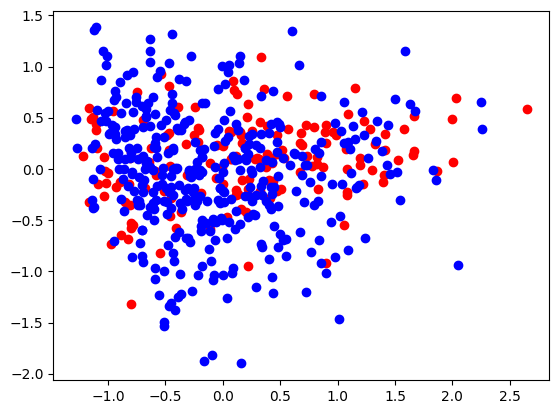

In [ ]:
plt.plot(X2[:165,0], X2[:165,1], "o", color="red")
plt.plot(X2[166:,0], X2[166:,1], "o", color="blue")

not well 🙁

In [ ]:
K1=pca.components_[0,:]
K2=pca.components_[1,:]
K3=pca.components_[2,:]
K4=pca.components_[3,:]

In [ ]:
list(K1).index(max(list(K1)))

261

ten most important variables for PCA

In [ ]:
heapq.nlargest(10, range(len(K1)), key=K1.__getitem__)

[261, 899, 419, 19, 900, 75, 797, 741, 339, 456]

# T-Sne

trying T-Sne

In [ ]:
tsne=TSNE(n_components=2)
Y_tsne=tsne.fit_transform(X)
print(tsne)
print(Y_tsne)

TSNE()
[[ 18.26056    -8.607357 ]
 [ 11.8035755 -13.563457 ]
 [ 14.457539   -7.526923 ]
 ...
 [  6.5587916  -5.22086  ]
 [ 19.248055  -14.288892 ]
 [-17.095264    5.968648 ]]


## Checking how well T-Sne is able to seperate data

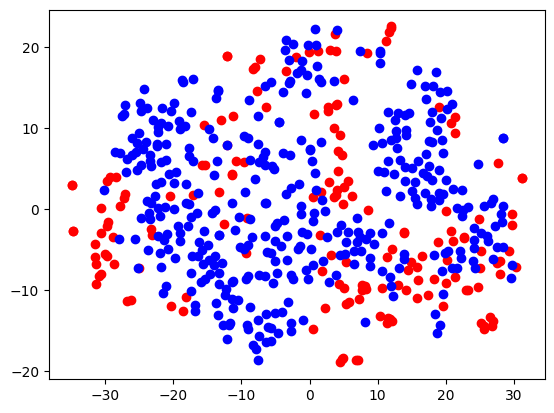

In [ ]:
plt.plot(Y_tsne[:165,0], Y_tsne[:165,1], "o", color="red")
plt.plot(Y_tsne[166:,0], Y_tsne[166:,1], "o", color="blue")

there is some separation but not enough to be significant

# KernelPCA

trying KernelPCA and at the same time checking how well is able to seperate data

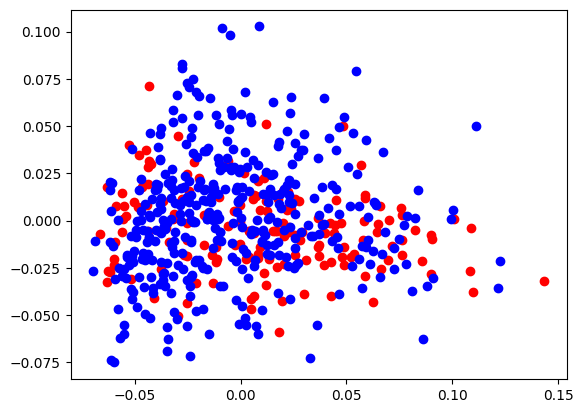

In [ ]:
kpca=KernelPCA(n_components = 2, kernel = "poly")
kpca.fit(X)
Y_kpca=kpca.fit_transform(X)
plt.plot(Y_kpca[:165,0], Y_kpca[:165,1], "o", color="red")
plt.plot(Y_kpca[166:,0], Y_kpca[166:,1], "o", color="blue")

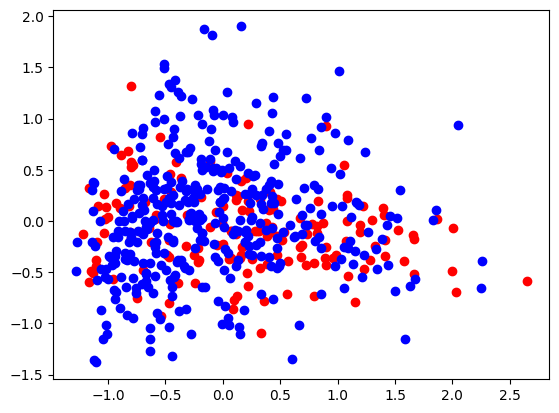

In [ ]:
kpca=KernelPCA(n_components = 2, kernel = "linear")
kpca.fit(X)
Y_kpca=kpca.fit_transform(X)
plt.plot(Y_kpca[:165,0], Y_kpca[:165,1], "o", color="red")
plt.plot(Y_kpca[166:,0], Y_kpca[166:,1], "o", color="blue")

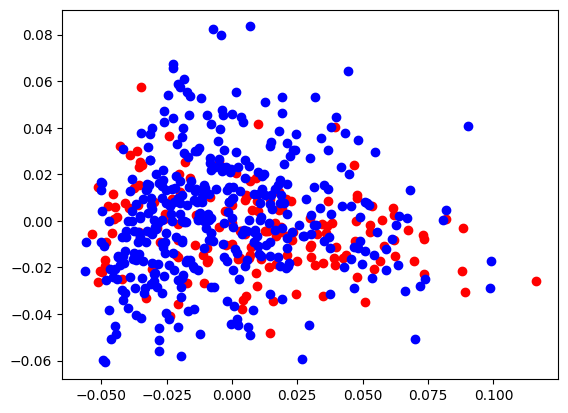

In [ ]:
kpca=KernelPCA(n_components = 2, kernel = "rbf")
kpca.fit(X)
Y_kpca=kpca.fit_transform(X)
plt.plot(Y_kpca[:165,0], Y_kpca[:165,1], "o", color="red")
plt.plot(Y_kpca[166:,0], Y_kpca[166:,1], "o", color="blue")

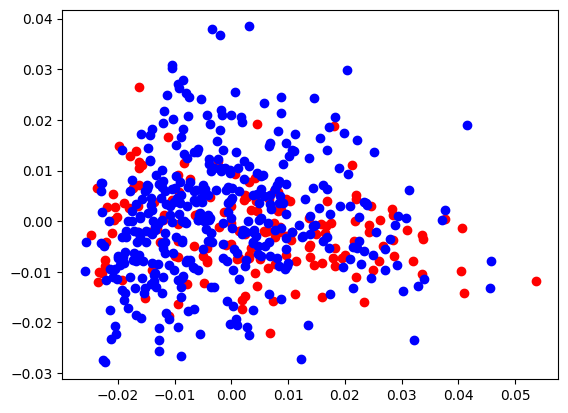

In [ ]:
kpca=KernelPCA(n_components = 2, kernel = "sigmoid")
kpca.fit(X)
Y_kpca=kpca.fit_transform(X)
plt.plot(Y_kpca[:165,0], Y_kpca[:165,1], "o", color="red")
plt.plot(Y_kpca[166:,0], Y_kpca[166:,1], "o", color="blue")

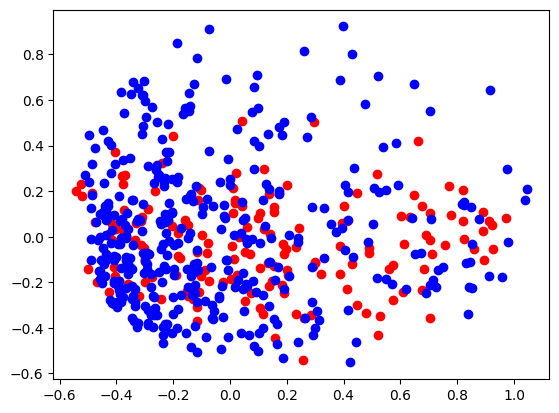

In [ ]:
kpca=KernelPCA(n_components = 2, kernel = "cosine")
kpca.fit(X)
Y_kpca=kpca.fit_transform(X)
plt.plot(Y_kpca[:165,0], Y_kpca[:165,1], "o", color="red")
plt.plot(Y_kpca[166:,0], Y_kpca[166:,1], "o", color="blue")

In [ ]:
kpca=KernelPCA(n_components = 2, kernel = "precomputed")
#kpca.fit(X)
#Y_kpca=kpca.fit_transform(X)
#plt.plot(Y_kpca[:165,0], Y_kpca[:165,1], "o", color="red")
#plt.plot(Y_kpca[166:,0], Y_kpca[166:,1], "o", color="blue")

not able at all

# Logistic regression with penalty

chcecking if logistic regression with L1 penalty can differeciate datasets

In [ ]:
X_trening, X_test, Y_trening, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
lr_1 = LogisticRegressionCV(penalty = "l1", solver = "liblinear")

model_lr_1 = lr_1.fit(X_trening, Y_trening)

In [ ]:
X_test.shape

(165, 1024)

In [ ]:
len(Y_test)

165

In [ ]:
predict_Y_lr_1=model_lr_1.predict(X_test)

In [ ]:
confusion_matrix(Y_test, predict_Y_lr_1)

array([[104,   9],
       [ 12,  40]])

In [ ]:
roc_auc_score(Y_test, predict_Y_lr_1)

0.844792375765827

In [ ]:
accuracy_score(Y_test, predict_Y_lr_1)

0.8727272727272727

In [ ]:
kf = KFold()

In [ ]:
acc=[]
auc=[]
# for i, (Y_train, Y_test) in enumerate(kf.split(X_trening)):
acc = cross_val_score(model_lr_1, X, Y, cv=5)
# auc = cross_val_score(model_lr_1, X, Y, cv=5, scoring="roc_auc_score")

In [ ]:
acc

array([0.79090909, 0.85454545, 0.90825688, 0.83486239, 0.88073394])

parameters are quite good

## Logistic regression with validation

### Lasso penalty

In [ ]:
X_trening, X_test, Y_trening, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
X_tren, X_valid, Y_tren, Y_valid = train_test_split(X_trening, Y_trening, test_size = 0.3)

In [ ]:
lrs_1 = LogisticRegressionCV(penalty = "l1", solver = "liblinear")
model_lrs_1 = lrs_1.fit(X_tren, Y_tren)

predict_Y_lrs_1=model_lrs_1.predict(X_valid)

confusion_matrix(Y_valid, predict_Y_lrs_1)

array([[72,  8],
       [14, 21]])

In [ ]:
roc_auc_score(Y_valid, predict_Y_lrs_1)

0.7500000000000001

In [ ]:
accuracy_score(Y_valid, predict_Y_lrs_1)

0.808695652173913

parameters are quite good

#### checking overfiting

In [ ]:
predict_Y_lrs_1=model_lrs_1.predict(X_tren)
confusion_matrix(Y_tren, predict_Y_lrs_1)

array([[190,   0],
       [  0,  77]])

In [ ]:
roc_auc_score(Y_tren, predict_Y_lrs_1)

1.0

In [ ]:
accuracy_score(Y_tren, predict_Y_lrs_1)

1.0

1.0, not great

### Reach peanlty

In [ ]:
lrs_2 = LogisticRegressionCV(penalty = "l2", solver = "liblinear")
model_lrs_2 = lrs_2.fit(X_tren, Y_tren)

predict_Y_lrs_2=model_lrs_2.predict(X_valid)

confusion_matrix(Y_valid, predict_Y_lrs_2)

array([[77,  3],
       [13, 22]])

In [ ]:
roc_auc_score(Y_valid, predict_Y_lrs_2)

0.7955357142857143

In [ ]:
accuracy_score(Y_valid, predict_Y_lrs_2)

0.8608695652173913

parameters are quite good as well

#### checking overfiting

In [ ]:
predict_Y_lrs_2=model_lrs_2.predict(X_tren)
confusion_matrix(Y_tren, predict_Y_lrs_2)

array([[190,   0],
       [  0,  77]])

In [ ]:
roc_auc_score(Y_tren, predict_Y_lrs_2)

1.0

In [ ]:
accuracy_score(Y_tren, predict_Y_lrs_2)

1.0

1.0, also not great

But we may be able to use Logistic regression to select features for Random Forests and Naive Bayes and SVM?

## Extracting features from logistic regression for Random forests

In [ ]:
for i in [10,20,30,50,100,200,300,500]:
  clf = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegressionCV(penalty="l1", solver = "liblinear"))),
    ('classification', RandomForestClassifier(n_estimators=i, max_depth=2))
    ])
  print(clf.fit(X_tren, Y_tren).score(X_tren, Y_tren), i)

0.8426966292134831 10
0.8539325842696629 20
0.8389513108614233 30
0.846441947565543 50
0.8314606741573034 100
0.8389513108614233 200
0.8426966292134831 300
0.8314606741573034 500


In [ ]:
for i in [10,20,30,50,100,200,300,500]:
  clf = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegressionCV(penalty="l1", solver = "liblinear"))),
    ('classification', RandomForestClassifier(n_estimators=i, max_depth=3))
    ])
  print(clf.fit(X_tren, Y_tren).score(X_tren, Y_tren), i)

0.8838951310861424 10
0.9101123595505618 20
0.9101123595505618 30
0.9063670411985019 50
0.9250936329588015 100
0.9288389513108615 200
0.9288389513108615 300
0.9176029962546817 500


In [ ]:
for i in [10,20,30,50,100,200,300,500]:
  clf = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegressionCV(penalty="l1", solver = "liblinear"))),
    ('classification', RandomForestClassifier(n_estimators=i, max_depth=4))
    ])
  print(clf.fit(X_tren, Y_tren).score(X_tren, Y_tren), i)

0.9325842696629213 10
0.9438202247191011 20
0.9325842696629213 30
0.9625468164794008 50
0.947565543071161 100
0.9662921348314607 200
0.947565543071161 300
0.947565543071161 500


looks promising

In [ ]:
dep_3=[]
dep_3_model=[]
drzewa=[10,15,20,25,30,35,40,45,50,55,60,70,80,90,100]
for i in drzewa:
  clf = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegressionCV(penalty="l1", solver = "liblinear"))),
    ('classification', RandomForestClassifier(n_estimators=i, max_depth=3))
    ])
  dep_3.append(clf.fit(X_tren, Y_tren).score(X_valid, Y_valid))
  dep_3_model.append(clf.fit(X_tren, Y_tren))

In [ ]:
dep_4=[]
dep_4_model=[]
for i in drzewa:
  clf = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegressionCV(penalty="l1", solver = "liblinear"))),
    ('classification', RandomForestClassifier(n_estimators=i, max_depth=4))
    ])
  dep_4.append(clf.fit(X_tren, Y_tren).score(X_valid, Y_valid))
  dep_4_model.append(clf.fit(X_tren, Y_tren))

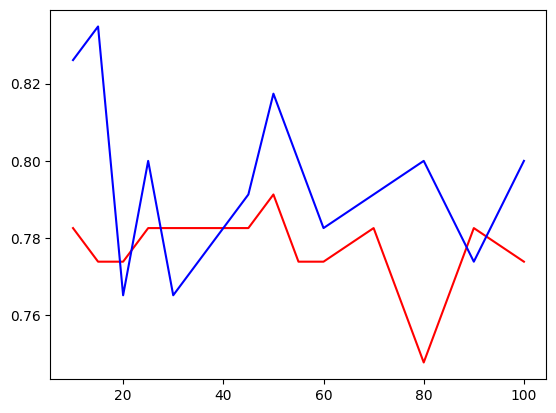

In [ ]:
plt.plot(drzewa, dep_3, color = "red")
plt.plot(drzewa, dep_4, color = "blue")

In [ ]:
cf_3=[]
auc_3=[]
acc_3=[]

for i in dep_3_model:
  predict_Y_rf_3=i.predict(X_valid)
  cf_3.append(confusion_matrix(Y_valid, predict_Y_rf_3))
  auc_3.append(roc_auc_score(Y_valid, predict_Y_rf_3))
  acc_3.append(accuracy_score(Y_valid, predict_Y_rf_3))

In [ ]:
cf_4=[]
auc_4=[]
acc_4=[]

for i in dep_4_model:
  predict_Y_rf_4=i.predict(X_valid)
  cf_4.append(confusion_matrix(Y_valid, predict_Y_rf_4))
  auc_4.append(roc_auc_score(Y_valid, predict_Y_rf_4))
  acc_4.append(accuracy_score(Y_valid, predict_Y_rf_4))

In [ ]:
cf_3[9]

array([[80,  0],
       [26,  9]])

In [ ]:
cf_4[9]

array([[79,  1],
       [20, 15]])

In [ ]:
cf_4_tren=[]
auc_4_tren=[]
acc_4_tren=[]

for i in dep_4_model:
  predict_Y_rf_4_tren=i.predict(X_tren)
  cf_4_tren.append(confusion_matrix(Y_tren, predict_Y_rf_4_tren))

In [ ]:
cf_4_tren[9]

array([[190,   0],
       [ 11,  66]])

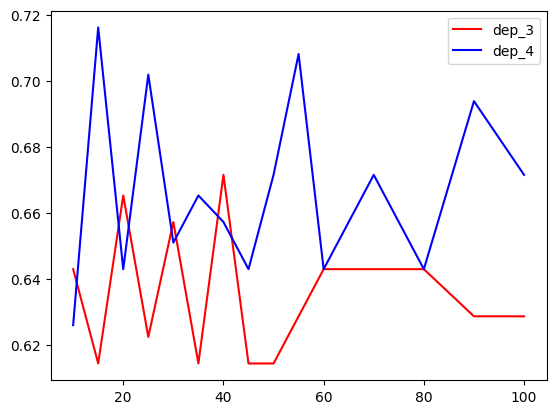

In [ ]:
plt.plot(drzewa, auc_3, color = "red")
plt.plot(drzewa, auc_4, color = "blue")
plt.legend(["dep_3", "dep_4"])

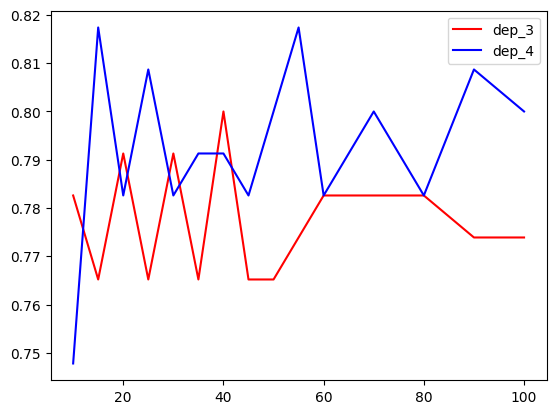

In [ ]:
plt.plot(drzewa, acc_3, color = "red")
plt.plot(drzewa, acc_4, color = "blue")
plt.legend(["dep_3", "dep_4"])

### checking overfiting

In [ ]:
predict_Y_rf_clf=clf.predict(X_tren)
confusion_matrix(Y_tren, predict_Y_rf_clf)

array([[190,   0],
       [ 10,  67]])

In [ ]:
predict_Y_rf_clf=clf.predict(X_valid)
confusion_matrix(Y_valid, predict_Y_rf_clf)

array([[80,  0],
       [23, 12]])

In [ ]:
roc_auc_score(Y_valid, predict_Y_rf_clf)

0.6714285714285715

In [ ]:
accuracy_score(Y_valid, predict_Y_rf_clf)

0.8

it's fine

## Extracting features from logistic regression for Naive bayes and SVM

In [ ]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LogisticRegressionCV(penalty="l1", solver = "liblinear"))),
  ('classification', GaussianNB())
  ])
clf.fit(X_tren, Y_tren)
clf.fit(X_tren, Y_tren).score(X_tren, Y_tren)

0.8539325842696629

In [ ]:
clf.fit(X_tren, Y_tren).score(X_valid, Y_valid)

0.808695652173913

In [ ]:
predict_Y_G=clf.predict(X_valid)
confusion_matrix(Y_valid, predict_Y_G)

array([[71,  9],
       [13, 22]])

In [ ]:
roc_auc_score(Y_valid, predict_Y_G)

0.7580357142857143

In [ ]:
accuracy_score(Y_valid, predict_Y_G)

0.808695652173913

In [ ]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LogisticRegressionCV(penalty="l1", solver = "liblinear"))),
  ('classification', LinearSVC())
  ])
clf.fit(X_tren, Y_tren)
clf.fit(X_tren, Y_tren).score(X_tren, Y_tren)

0.9400749063670412

In [ ]:
predict_Y_G=clf.predict(X_tren)
confusion_matrix(Y_tren, predict_Y_G)

array([[189,   1],
       [ 15,  62]])

In [ ]:
clf.fit(X_tren, Y_tren).score(X_valid, Y_valid)

0.8521739130434782

In [ ]:
predict_Y_G=clf.predict(X_valid)
confusion_matrix(Y_valid, predict_Y_G)

array([[76,  4],
       [13, 22]])

In [ ]:
roc_auc_score(Y_valid, predict_Y_G)

0.7892857142857143

In [ ]:
accuracy_score(Y_valid, predict_Y_G)

0.8521739130434782

it is also fine